In [1]:
import pandas as pd
import numpy as np
import nltk
from pathlib import Path
import dtale
import pprint
from matplotlib import pyplot as plt
import matplotlib

In [2]:
df1 = pd.read_csv("./oesch8_nur/nn.csv",  sep = ",")
df2 = pd.read_csv("./oesch8_nur/xgb.csv",  sep = ",")
df3 = pd.read_csv("./oesch8_nur/linear.csv",  sep = ",")
df = pd.concat([df1, df2, df3])
df= df.rename(columns={'combi average.combi validation accuracy': 'confidence average @0.0.validation accuracy @0.0: '})
df['confidence average @0.0.percentage labelled @0.0: '] = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
df.head(10)

,Name,combi_model,confidence average @0.0.validation accuracy @0.0:,confidence average @0.5.percentage labelled @0.5:,confidence average @0.55.percentage labelled @0.55:,confidence average @0.6.percentage labelled @0.6:,confidence average @0.65.percentage labelled @0.65:,confidence average @0.7.percentage labelled @0.7:,confidence average @0.75.percentage labelled @0.75:,confidence average @0.8.percentage labelled @0.8:,...,confidence average @0.98.validation accuracy @0.98:,confidence average @0.99.validation accuracy @0.99:,confidence average @0.992.validation accuracy @0.992:,confidence average @0.994.validation accuracy @0.994:,confidence average @0.995.validation accuracy @0.995:,confidence average @0.996.validation accuracy @0.996:,confidence average @0.997.validation accuracy @0.997:,confidence average @0.998.validation accuracy @0.998:,confidence average @0.999.validation accuracy @0.999:,confidence average @0.0.percentage labelled @0.0:
0,"""real_third""",nn,0.864407,1,0.986863,0.976347,0.962870,0.947437,0.932340,0.909353,...,0.943013,0.950190,0.951930,0.958133,0.959353,0.960930,0.962103,0.970087,0.978917,1.0
1,"""third""",nn,0.859333,1,0.989000,0.978000,0.965000,0.949667,0.937333,0.913667,...,0.944000,0.952000,0.954667,0.961333,0.964667,0.968000,0.971667,0.976667,0.978333,1.0
2,"""best""",nn,0.860667,1,0.990333,0.977000,0.961333,0.948000,0.931667,0.912333,...,0.935667,0.945000,0.948000,0.950667,0.952333,0.953333,0.959000,0.967333,0.899667,1.0
3,"""second""",nn,0.858333,1,0.989333,0.975667,0.963333,0.949667,0.936000,0.914667,...,0.940000,0.948000,0.951000,0.953667,0.955333,0.959333,0.964000,0.971000,0.876333,1.0
0,"""real_third""",xgboost,0.847647,1,0.993763,0.982280,0.974740,0.962610,0.957367,0.943900,...,0.918377,0.926293,0.929303,0.930493,0.931930,0.934250,0.937730,0.945287,0.957443,1.0
1,"""third""",xgboost,0.853667,1,0.998000,0.995667,0.991000,0.979333,0.972333,0.951667,...,0.907000,0.916667,0.920000,0.923000,0.926000,0.929667,0.935333,0.939000,0.953333,1.0
2,"""best""",xgboost,0.856000,1,0.996000,0.991333,0.980000,0.977000,0.964000,0.955000,...,0.912000,0.920000,0.924000,0.927667,0.928667,0.932333,0.936000,0.941333,0.953667,1.0
3,"""second""",xgboost,0.853000,1,0.996667,0.990667,0.983000,0.976000,0.967667,0.956667,...,0.911000,0.919000,0.920333,0.924000,0.925667,0.927000,0.928667,0.935333,0.954000,1.0
0,"""real_third""",linear,0.860790,1,0.980623,0.966160,0.946120,0.922817,0.893903,0.862053,...,0.961547,0.969367,0.971427,0.978710,0.979537,0.982097,0.992367,0.400000,0.000000,1.0
1,"""third""",linear,0.861667,1,0.984333,0.968333,0.950333,0.929667,0.905000,0.872000,...,0.958000,0.969333,0.974000,0.975667,0.979333,0.982667,0.994000,0.066667,0.000000,1.0


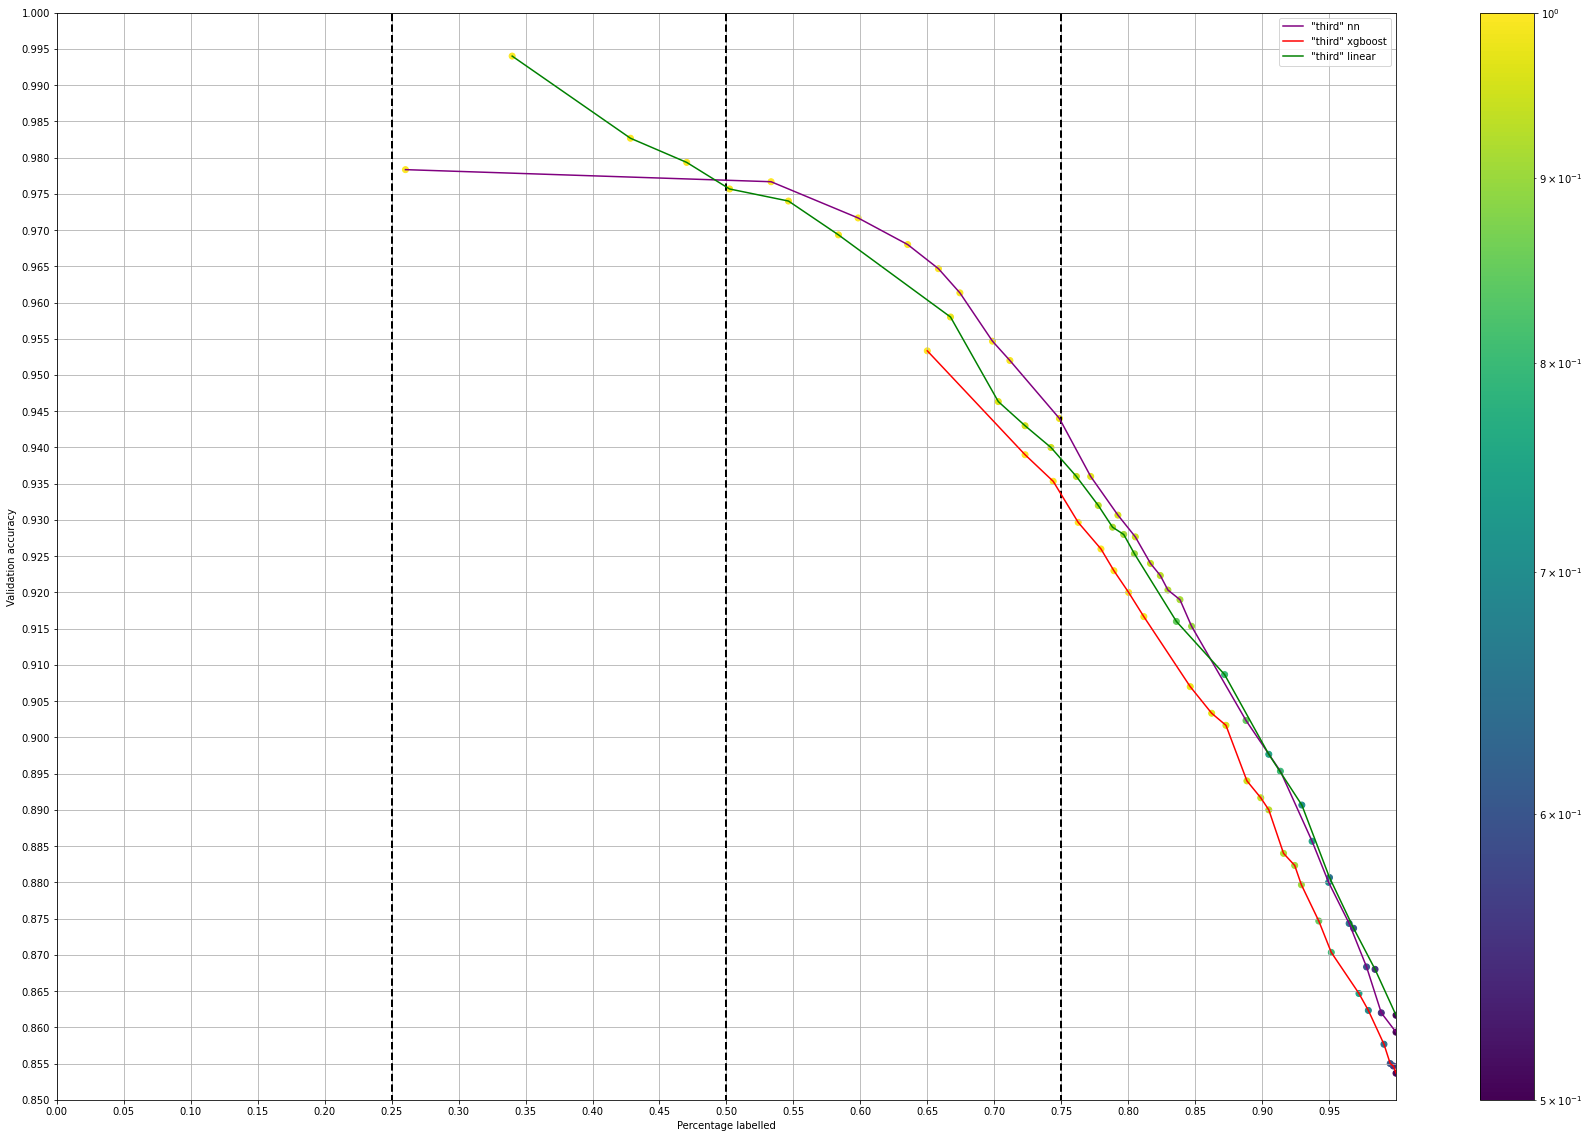

In [7]:
df1 = pd.read_csv("./oesch8_nur/nn.csv",  sep = ",")
df2 = pd.read_csv("./oesch8_nur/xgb.csv",  sep = ",")
df3 = pd.read_csv("./oesch8_nur/linear.csv",  sep = ",")
df = pd.concat([df1, df2, df3])
df= df.rename(columns={'combi average.combi validation accuracy': 'confidence average @0.0.validation accuracy @0.0: '})
df['confidence average @0.0.percentage labelled @0.0: '] = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

#df = df[df.combi_model=="nn"] #third bestes, aber besonders im späteren bereich
#df = df[df.combi_model=="xgboost"] # best bestes deutlich
#df = df[df.combi_model=="linear"] # best bestes

#df = df[df['Name'] == '"best"']
#df = df[df['Name'] == '"second"']
df = df[df['Name'] == '"third"'] # laut optimization bestes modell
#df = df[df['Name'] == '"real_third"']

names = df.Name.values
combi_model = df.combi_model.values
#val_acc= df['combi average.combi validation accuracy'].values
colors = ["purple", "red", "green", "yellow", "orange", "blue", "pink", "brown", "grey", "magenta", "cyan", "lime"]
colors = np.asarray(colors)#display(df)


output = None
percentages = []
accuracies = []

confidences = [0.0, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,0.992,0.994,0.995, 0.996, 0.997, 0.998, 0.999]
#confidences.reverse()


accuracies.append

for i in confidences:
    perc = f"confidence average @{i}.percentage labelled @{i}: "
    acc = f"confidence average @{i}.validation accuracy @{i}: "
    # hängt alle 9 percentages für gegebene confidence an
    percentages.append(df[perc])
    # hängt alle 9 accuracies für gegebene confidence an
    accuracies.append(df[acc])
    #print(df[f"confidence average @{i}.percentage labelled @{i}: "]) 

accuracies= np.column_stack(accuracies)
accuracies = [x for x in accuracies]
percentages = np.column_stack(percentages)
percentages = [x for x in percentages]

# ich gehe durch die accuracies und ersetze werte wenn es wieder kleiner wird durch nan
for row in range(len(accuracies)):
    max = 0
    for value in range(len(accuracies[row])):
        if accuracies[row][value]<max:
            accuracies[row][value] = None
        else:
            max = accuracies[row][value]


plt.figure(figsize= (30,20))
for perc, acc, name, combi_mod, linecolor in zip(percentages, accuracies, names, combi_model, colors):
    #print(percentages)
    #for i, j, k in zip(perc, acc, confidences):
    plt.scatter(x=perc, y=acc, c=confidences, norm=matplotlib.colors.LogNorm(vmin=0.5, vmax=1.0))
    plt.plot(perc, acc, c=linecolor,  label = f"{name} {combi_mod}")
plt.colorbar()

plt.xlim((0, 1))
#plt.xscale('log')
plt.ylim((0.85, 1.0))
plt.grid()
plt.yticks(np.arange(0.85, 1, step=0.005))
plt.xticks(np.arange(0, 1, step=0.05))
plt.xlabel("Percentage labelled")
plt.ylabel("Validation accuracy")
plt.legend()
plt.vlines(x=[0.25, 0.5, 0.75], ymin=0, ymax=1, colors='black', ls='--', lw=2)
#plt.title("")
plt.show()

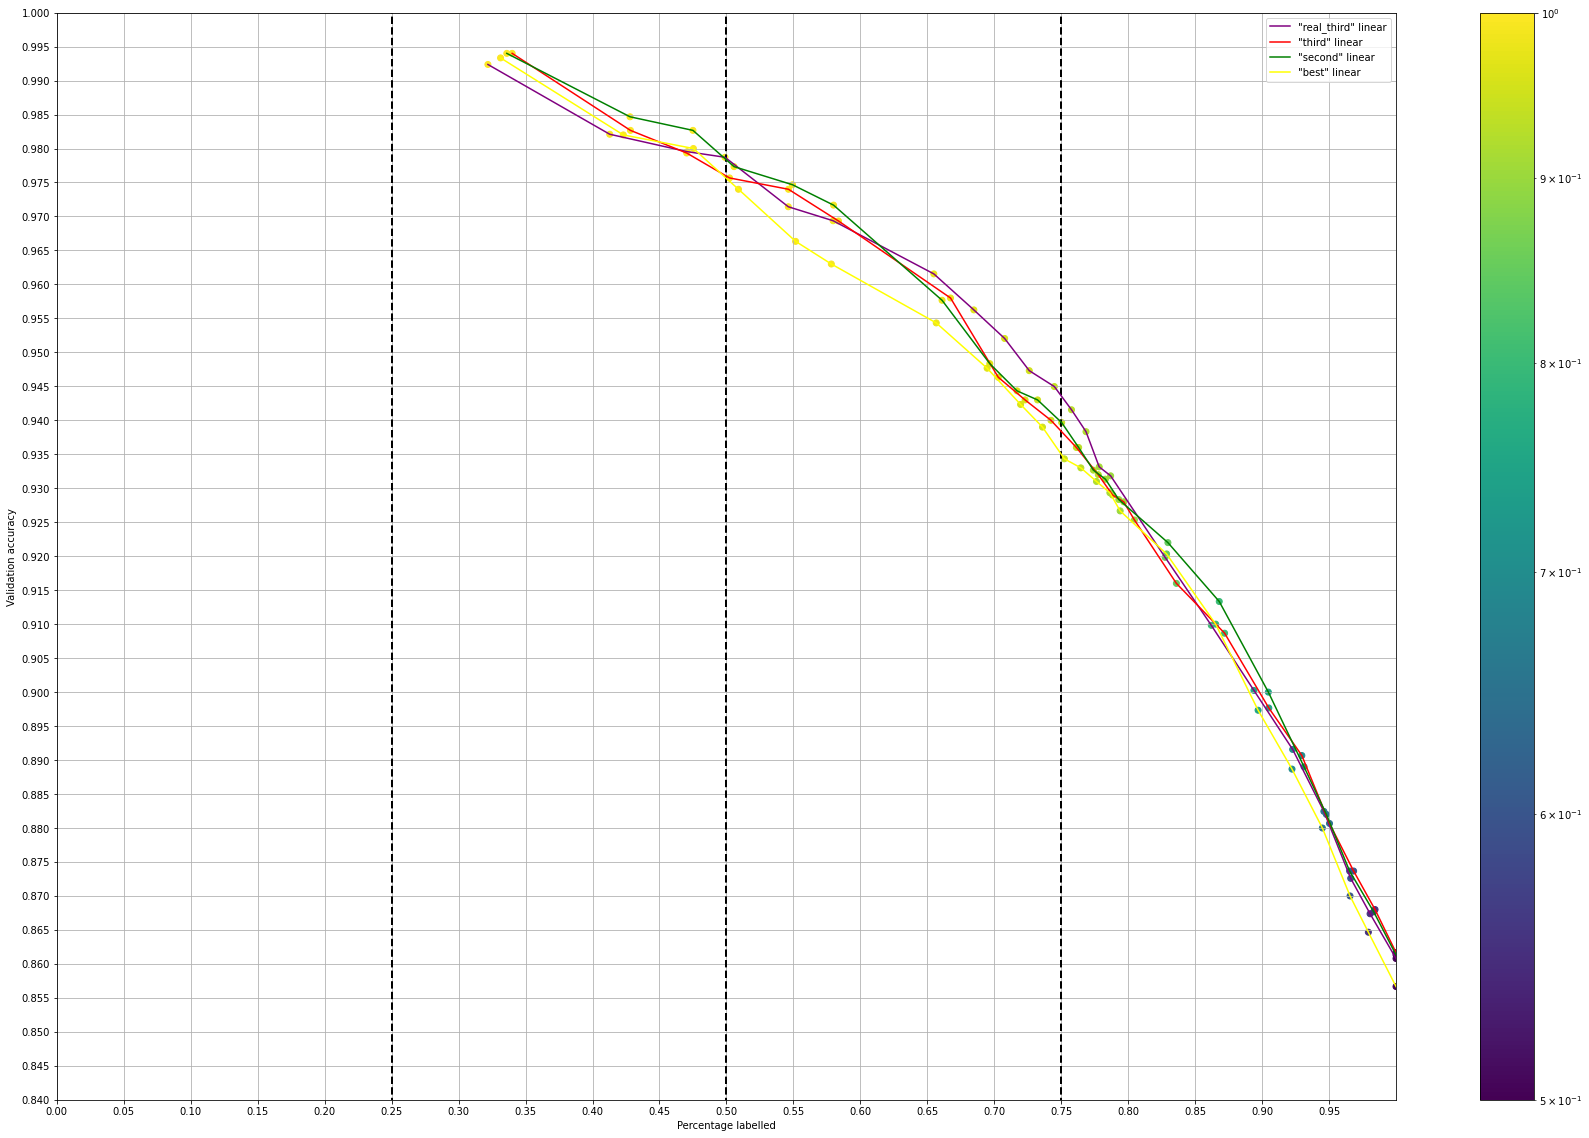

In [8]:
df1 = pd.read_csv("./oesch8_nur/nn.csv",  sep = ",")
df2 = pd.read_csv("./oesch8_nur/xgb.csv",  sep = ",")
df3 = pd.read_csv("./oesch8_nur/linear.csv",  sep = ",")
df = pd.concat([df1, df2, df3])
df= df.rename(columns={'combi average.combi validation accuracy': 'confidence average @0.0.validation accuracy @0.0: '})
df['confidence average @0.0.percentage labelled @0.0: '] = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

#df = df[df.combi_model=="nn"]
#df = df[df.combi_model=="xgboost"]
df = df[df.combi_model=="linear"]

#df = df[df['Name'] == '"best"']
#df = df[df['Name'] == '"second"']
#df = df[df['Name'] == '"third"']
#df = df[df['Name'] == '"real_third"']

names = df.Name.values
combi_model = df.combi_model.values
#val_acc= df['combi average.combi validation accuracy'].values
colors = ["purple", "red", "green", "yellow", "orange", "blue", "pink", "brown", "grey", "magenta", "cyan", "lime"]
colors = np.asarray(colors)#display(df)


output = None
percentages = []
accuracies = []

confidences = [0.0, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,0.992,0.994,0.995, 0.996, 0.997, 0.998, 0.999]
#confidences.reverse()


accuracies.append

for i in confidences:
    perc = f"confidence average @{i}.percentage labelled @{i}: "
    acc = f"confidence average @{i}.validation accuracy @{i}: "
    # hängt alle 9 percentages für gegebene confidence an
    percentages.append(df[perc])
    # hängt alle 9 accuracies für gegebene confidence an
    accuracies.append(df[acc])
    #print(df[f"confidence average @{i}.percentage labelled @{i}: "]) 

accuracies= np.column_stack(accuracies)
accuracies = [x for x in accuracies]
percentages = np.column_stack(percentages)
percentages = [x for x in percentages]

# ich gehe durch die accuracies und ersetze werte wenn es wieder kleiner wird durch nan
for row in range(len(accuracies)):
    max = 0
    for value in range(len(accuracies[row])):
        if accuracies[row][value]<max:
            accuracies[row][value] = None
        else:
            max = accuracies[row][value]


plt.figure(figsize= (30,20))
for perc, acc, name, combi_mod, linecolor in zip(percentages, accuracies, names, combi_model, colors):
    #print(percentages)
    #for i, j, k in zip(perc, acc, confidences):
    plt.scatter(x=perc, y=acc, c=confidences, norm=matplotlib.colors.LogNorm(vmin=0.5, vmax=1.0))
    plt.plot(perc, acc, c=linecolor,  label = f"{name} {combi_mod}")
plt.colorbar()

plt.xlim((0, 1))
#plt.xscale('log')
plt.ylim((0.84, 1.0))
plt.grid()
plt.yticks(np.arange(0.84, 1, step=0.005))
plt.xticks(np.arange(0, 1, step=0.05))
plt.xlabel("Percentage labelled")
plt.ylabel("Validation accuracy")
plt.legend()
plt.vlines(x=[0.25, 0.5, 0.75], ymin=0, ymax=1, colors='black', ls='--', lw=2)
#plt.title("")
plt.show()